In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import joblib
import xgboost as xgb
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
print('Number of ROws: ',data.shape[0])
print('Number of Columns: ',data.shape[1])

Number of ROws:  10000
Number of Columns:  14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#check the Null Values in the dataset
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#overall statistics about dataset
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Encoding Categorical Data
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data  = pd.get_dummies(data,drop_first=True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
#Not handling Imbalanced
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

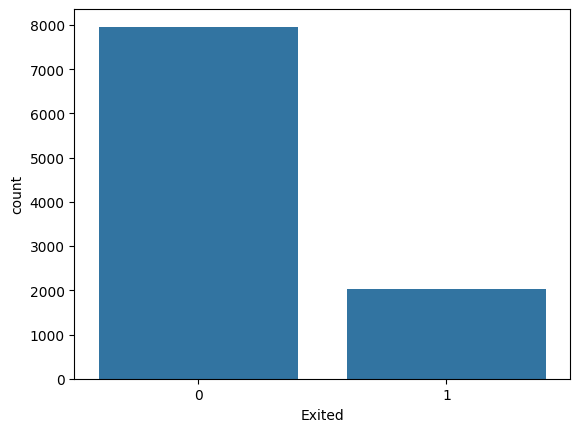

In [ ]:
sns.countplot(x=data['Exited'])

In [ ]:
x = data.drop('Exited',axis=1)
y = data['Exited']

In [ ]:
#Handling Imbalanced Dataset with SMOTE (synthetic minority oversampling technique)
x_res,y_res = SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [ ]:
#Splitting the Dataset into Training set and Testing set
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=42)

In [ ]:
#Feature Scaling
sc=StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Logistic Regression
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_preds1 = log.predict(x_test)


In [ ]:
accuracy_score(y_test,y_preds1)

0.7740112994350282

In [ ]:
precision_score(y_test,y_preds1)

0.7671584348941629

In [ ]:
recall_score(y_test,y_preds1)

0.7701223438506117

In [ ]:
f1_score(y_test,y_preds1)

0.768637532133676

In [ ]:
auc = metrics.roc_auc_score(y_test, y_preds1)

In [ ]:
auc

0.7739160402657835

In [ ]:
#SVM
svm = svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_preds2 = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds2)

0.8411801632140615

In [ ]:
precision_score(y_test,y_preds2)

0.8410423452768729

In [ ]:
#KNeighbors Classifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_preds3 = knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds3)

0.817639673571877

In [ ]:
precision_score(y_test,y_preds3)

0.8064312736443884

In [ ]:
#Decision tree Classifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_preds4 = dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds4)

0.8010043942247332

In [ ]:
precision_score(y_test,y_preds4)

0.7820748925721301

In [ ]:
#Random forest classifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_preds5 = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds5)

0.8709981167608286

In [ ]:
precision_score(y_test,y_preds5)

0.8669665809768637

In [ ]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_preds6 = gbc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds6)

0.8392969240426867

In [ ]:
precision_score(y_test,y_preds6)

0.8426596445029625

In [ ]:
#xgboost algorithm
xgb_cl = xgb.XGBClassifier()

In [ ]:
xgb_cl.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_preds7 = xgb_cl.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds7)

0.8603264281230383

In [ ]:
precision_score(y_test,y_preds7)

0.8555840821566111

In [ ]:
auc = metrics.roc_auc_score(y_test, y_preds7)

In [ ]:
auc

0.8602777391130849

In [ ]:
###############################################################

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'ACC':[accuracy_score(y_test,y_preds1),
                                 accuracy_score(y_test,y_preds2),
                                 accuracy_score(y_test,y_preds3),
                                 accuracy_score(y_test,y_preds4),
                                 accuracy_score(y_test,y_preds5),
                                 accuracy_score(y_test,y_preds6),
                                 accuracy_score(y_test,y_preds7)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.774011
1,SVC,0.841180
2,KNN,0.817640
3,DT,0.801004
4,RF,0.870998
5,GBC,0.839297
6,XGB,0.860326


<Axes: xlabel='Models', ylabel='ACC'>

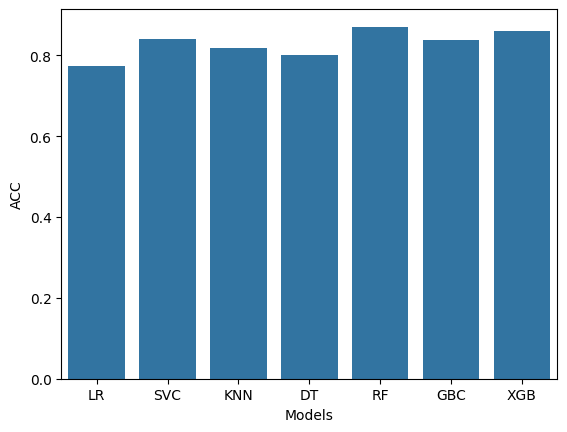

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['ACC'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'PRE':[precision_score(y_test,y_preds1),
                                 precision_score(y_test,y_preds2),
                                 precision_score(y_test,y_preds3),
                                 precision_score(y_test,y_preds4),
                                 precision_score(y_test,y_preds5),
                                 precision_score(y_test,y_preds6),
                                 precision_score(y_test,y_preds7)]})

In [ ]:
final_data

,Models,PRE
0,LR,0.767158
1,SVC,0.841042
2,KNN,0.806431
3,DT,0.782075
4,RF,0.866967
5,GBC,0.842660
6,XGB,0.855584


<Axes: xlabel='Models', ylabel='PRE'>

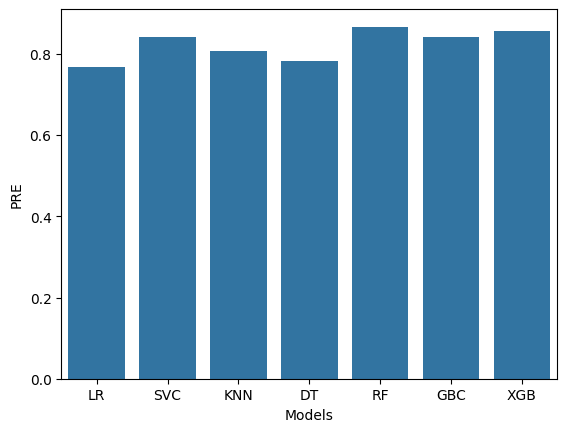

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['PRE'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'REC':[recall_score(y_test,y_preds1),
                                 recall_score(y_test,y_preds2),
                                 recall_score(y_test,y_preds3),
                                 recall_score(y_test,y_preds4),
                                 recall_score(y_test,y_preds5),
                                 recall_score(y_test,y_preds6),
                                 recall_score(y_test,y_preds7)]})

In [ ]:
final_data

,Models,REC
0,LR,0.770122
1,SVC,0.831294
2,KNN,0.823567
3,DT,0.820348
4,RF,0.868641
5,GBC,0.824211
6,XGB,0.858339


<Axes: xlabel='Models', ylabel='REC'>

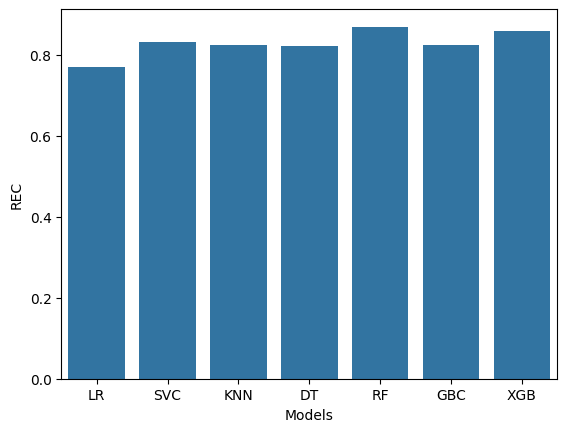

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['REC'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'F1':[f1_score(y_test,y_preds1),
                                 f1_score(y_test,y_preds2),
                                 f1_score(y_test,y_preds3),
                                 f1_score(y_test,y_preds4),
                                 f1_score(y_test,y_preds5),
                                 f1_score(y_test,y_preds6),
                                 f1_score(y_test,y_preds7)]})

In [ ]:
final_data

,Models,F1
0,LR,0.768638
1,SVC,0.836140
2,KNN,0.814909
3,DT,0.800754
4,RF,0.867803
5,GBC,0.833333
6,XGB,0.856959


<Axes: xlabel='Models', ylabel='F1'>

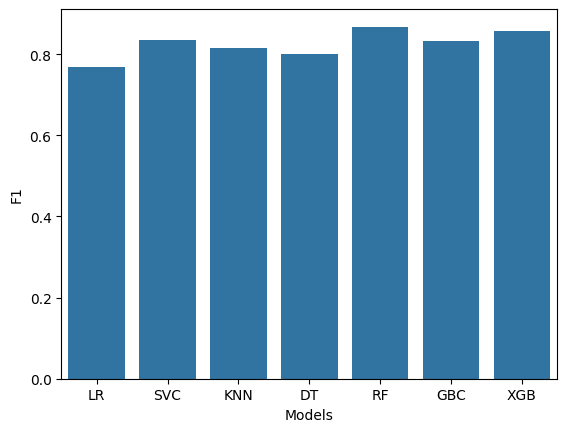

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['F1'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'AUC':[metrics.roc_auc_score(y_test,y_preds1),
                                 metrics.roc_auc_score(y_test,y_preds2),
                                 metrics.roc_auc_score(y_test,y_preds3),
                                 metrics.roc_auc_score(y_test,y_preds4),
                                 metrics.roc_auc_score(y_test,y_preds5),
                                 metrics.roc_auc_score(y_test,y_preds6),
                                 metrics.roc_auc_score(y_test,y_preds7)]})

In [ ]:
final_data

,Models,AUC
0,LR,0.773916
1,SVC,0.840938
2,KNN,0.817785
3,DT,0.801478
4,RF,0.870940
5,GBC,0.838927
6,XGB,0.860278


<Axes: xlabel='Models', ylabel='AUC'>

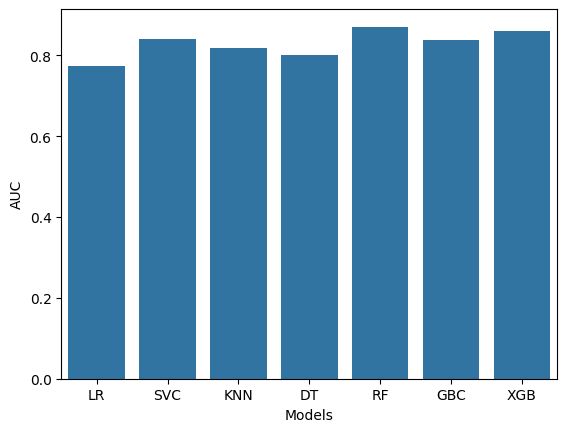

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['AUC'])

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_preds7)
cm

array([[1408,  225],
       [ 220, 1333]])

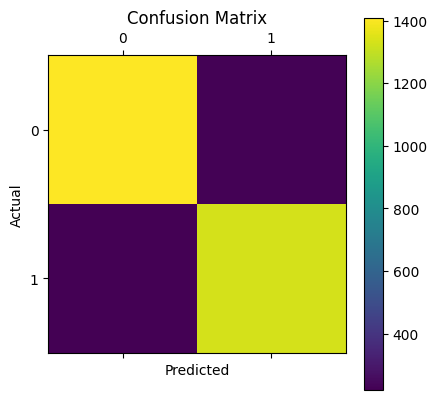

In [ ]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

In [ ]:
matrix = classification_report(y_test,y_preds7)
print(matrix)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1633
           1       0.86      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [ ]:
#Saving The Model
x_res = sc.fit_transform(x_res)

In [ ]:
xgb_cl.fit(x_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
joblib.dump(xgb_cl,'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')